# Выбор локации для скважины


Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import RandomState
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [ ]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
------------------------------------------------------------------------------------------
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
------------------------------------------------------------------------------------------
                  f0             f1             f2        product
count  10000

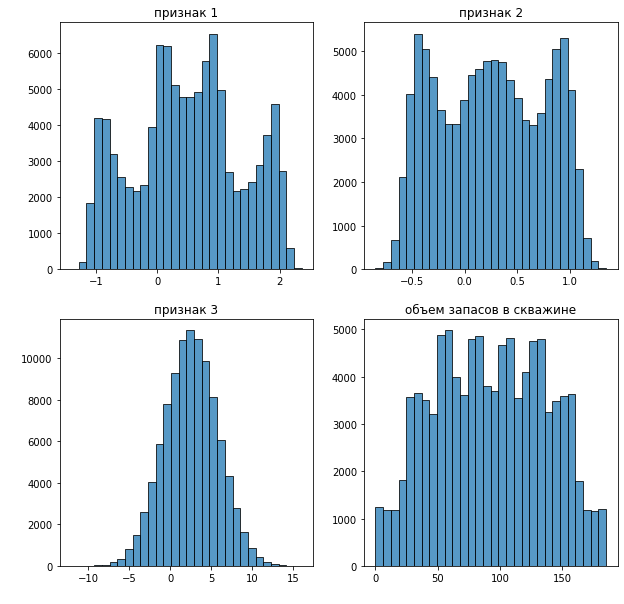

In [ ]:
df_0.info()
print('-' * 90)
print(df_0.head())
print('-' * 90)
print(df_0.describe())
print('-' * 90)
print(df_0['id'].value_counts().head(10))
print('-' * 90)

fig, ax = plt.subplots(2, 2 , figsize = (10,10))

sns.histplot(df_0['f0'], ax = ax[0,0], bins = 30)
ax[0,0].set(title = 'признак 1', xlabel = ' ', ylabel = ' ')
sns.histplot(df_0['f1'], ax = ax[0,1], bins = 30)
ax[0,1].set(title = 'признак 2', xlabel = ' ', ylabel = ' ')
sns.histplot(df_0['f2'], ax = ax[1, 0], bins = 30)
ax[1,0].set(title = 'признак 3', xlabel = ' ', ylabel = ' ')
sns.histplot(df_0['product'], ax = ax[1,1],  bins = 30)
ax[1,1].set(title = 'объем запасов в скважине', xlabel = ' ', ylabel = ' ')

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
------------------------------------------------------------------------------------------
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
------------------------------------------------------------------------------------------
                  f0             f1             f2        product


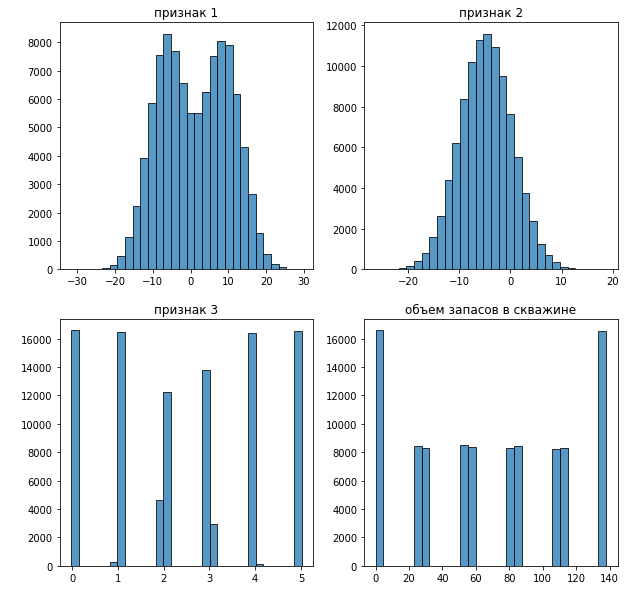

In [ ]:
df_1.info()
print('-' * 90)
print(df_1.head())
print('-' * 90)
print(df_1.describe())
print('-' * 90)
print(df_1['id'].value_counts().head(10))
print('-' * 90)

fig, ax = plt.subplots(2, 2 , figsize = (10,10))

sns.histplot(df_1['f0'], ax = ax[0,0], bins = 30)
ax[0,0].set(title = 'признак 1', xlabel = ' ', ylabel = ' ')
sns.histplot(df_1['f1'], ax = ax[0,1], bins = 30)
ax[0,1].set(title = 'признак 2', xlabel = ' ', ylabel = ' ')
sns.histplot(df_1['f2'], ax = ax[1, 0], bins = 30)
ax[1,0].set(title = 'признак 3', xlabel = ' ', ylabel = ' ')
sns.histplot(df_1['product'], ax = ax[1,1],  bins = 30)
ax[1,1].set(title = 'объем запасов в скважине', xlabel = ' ', ylabel = ' ')

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
------------------------------------------------------------------------------------------
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
------------------------------------------------------------------------------------------
                  f0             f1             f2        product
count  10000

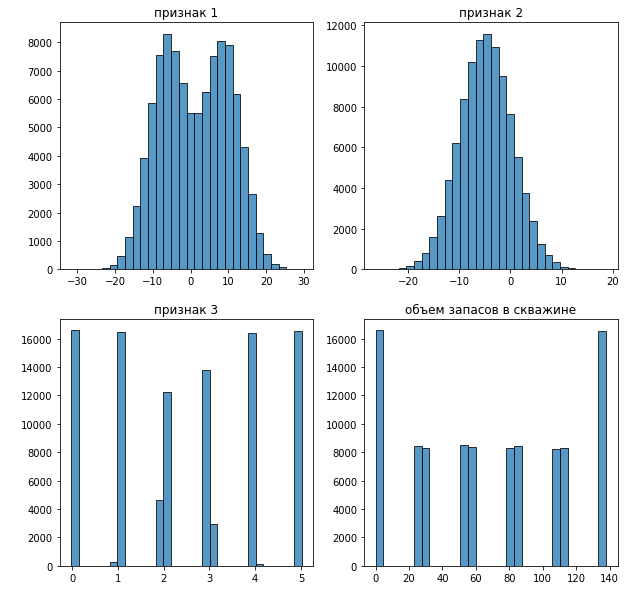

In [ ]:
df_2.info()
print('-' * 90)
print(df_2.head())
print('-' * 90)
print(df_2.describe())
print('-' * 90)
print(df_2['id'].value_counts().head(10))
print('-' * 90)

fig, ax = plt.subplots(2, 2 , figsize = (10,10))

sns.histplot(df_1['f0'], ax = ax[0,0], bins = 30)
ax[0,0].set(title = 'признак 1', xlabel = ' ', ylabel = ' ')
sns.histplot(df_1['f1'], ax = ax[0,1], bins = 30)
ax[0,1].set(title = 'признак 2', xlabel = ' ', ylabel = ' ')
sns.histplot(df_1['f2'], ax = ax[1, 0], bins = 30)
ax[1,0].set(title = 'признак 3', xlabel = ' ', ylabel = ' ')
sns.histplot(df_1['product'], ax = ax[1,1],  bins = 30)
ax[1,1].set(title = 'объем запасов в скважине', xlabel = ' ', ylabel = ' ')

plt.show()

In [ ]:
df_0 = df_0.drop('id', axis = 1)

df_1 = df_1.drop('id', axis = 1)

df_2 = df_2.drop('id', axis = 1)

# вывод:
 - мы открыли данные сохранили в переменные наши датафреймы
 - вывели первую информацию о датафреймах, с нашими даннами все в порядке, нулевых и пустых значений нет, все данные в порядке.
 - вывели графики и посмотрели что данные распределнны нормально.
 - вывели подробную информацию о наших датасетах
 - Данные полностью нормальные можно переходить к следующей задаче
 - Удалили столбец ID, что бы не мешался при обучение данных и прогнозирования модели, а так же там были повторяющиеся ID, видимо появились при человеческом факторе
 
 

## Обучение и проверка модели

In [ ]:
# разделили на признаки и целевой признак каждый датафрейм
def separation(df):
    
    features = df.drop(['product'], axis = 1)
    target = df['product']
    
    return features, target

In [ ]:
features_0, target_0 = separation(df_0)

features_1, target_1 = separation(df_1)

features_2, target_2 = separation(df_2)

In [ ]:
#разделим выборки на тренировочную и валидационную выборку в соотношение 75 на 25
def split(features, target):
    
    features_train, features_valid, target_train, target_valid= train_test_split (features,
                                                                                  target,
                                                                                  test_size = 0.25,
                                                                                  random_state = 42)
    
    return features_train, features_valid, target_train, target_valid

In [ ]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = split(features_0, target_0)

features_train_1, features_valid_1, target_train_1, target_valid_1 = split(features_1, target_1)

features_train_2, features_valid_2, target_train_2, target_valid_2 = split(features_2, target_2)

In [ ]:
print('features_train_0:',len(features_train_0))
print('target_train_0:', len(target_train_0))
print('features_valid_0:', len(features_valid_0))
print('target_valid_0:',len(target_valid_0))
print('-' * 45)
print('features_train_1:',len(features_train_1))
print('target_train_1:',len(target_train_1))
print('features_valid_1:',len(features_valid_1))
print('target_valid_1:', len(target_valid_1))
print('-' * 45)
print('features_train_2:',len(features_train_2))
print('target_train_2:',len(target_train_2))
print('features_valid_2:',len(features_valid_2))
print('target_valid_2:', len(target_valid_2))

features_train_0: 75000
target_train_0: 75000
features_valid_0: 25000
target_valid_0: 25000
---------------------------------------------
features_train_1: 75000
target_train_1: 75000
features_valid_1: 25000
target_valid_1: 25000
---------------------------------------------
features_train_2: 75000
target_train_2: 75000
features_valid_2: 25000
target_valid_2: 25000


In [ ]:
#Провели масштабирование признаков, привели их к ближайшим значениям
pd.options.mode.chained_assignment = None

def standard_scaler (features_train, features_valid):
    
    num = list(features_train.select_dtypes(exclude ='object').columns)
    
    scaler= StandardScaler()
    scaler.fit(features_train[num])
    
    features_train[num] = scaler.transform(features_train[num])
    features_valid[num] = scaler.transform(features_valid[num])
    
    return features_train , features_valid

data_train = [features_train_0, features_train_1, features_train_2]
data_valid = [features_valid_0, features_valid_1, features_valid_2]

for i in range (len(data_train)):
    standard_scaler(data_train[i], data_valid[i])

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler был обучен только на треине!
</div>

In [ ]:
#выведем  количество отмасштабированных признаков
print(len(features_train_0))
print(len(features_valid_0))

75000
25000


In [ ]:
#обучили и предсказали модели сохранили RMSE и средний запас сырья в переменные и выевели их
def predictions_model (features_train, target_train, features_valid, target_valid):
    model = LinearRegression()

    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)

    result = mean_squared_error(target_valid, predictions_valid) ** 0.5
    
    return result, predictions_valid.mean(), predictions_valid


In [ ]:
RMSE_0, result_mean_0, predictions_valid_0 = predictions_model(features_train_0,
                                                               target_train_0,
                                                               features_valid_0,
                                                               target_valid_0)
print('-' * 45)
print(f'RMSE: {RMSE_0}, Средний запас сырья: {result_mean_0}')

RMSE_1, result_mean_1, predictions_valid_1 = predictions_model(features_train_1,
                                                               target_train_1,
                                                               features_valid_1,
                                                               target_valid_1)
print('-' * 45)
print(f'RMSE: {RMSE_1},  Средний запас сырья: {result_mean_1}')

RMSE_2, result_mean_2, predictions_valid_2 =predictions_model(features_train_2,
                                                              target_train_2,
                                                              features_valid_2,
                                                              target_valid_2)

print('-' * 45)
print(f'RMSE: {RMSE_2}, Средний запас сырья: {result_mean_2}')
print('-' * 45)

---------------------------------------------
RMSE: 37.75660035026169, Средний запас сырья: 92.39879990657768
---------------------------------------------
RMSE: 0.8902801001028846,  Средний запас сырья: 68.7128780391376
---------------------------------------------
RMSE: 40.145872311342174, Средний запас сырья: 94.77102387765939
---------------------------------------------


 # Вывод:
 - разделили выборки на тренировочную и валидационную
 - отмасштабировали признаки
 - обучили модель и сделали предсказания на валидационной выборке, сохранили RMSE и средний запас сырья в переменные
 - исходя из RMSE можем сделать первоначальный вывод что наша модель лучше всего предсказала данные по второму региону, (Чем ниже RMSE тем модель точнее предсказывает), так же мы видим что средний запас сырья в этом регионе меньше, чем в остальных двух регионах. 

## Подготовка к расчёту прибыли

In [ ]:
BUDGET = 10_000_000_000 # бюджет на разработку скважин
REVENUE_UNIT_PROD = 450_000 # доход с каждой единице продукта
NUMBER_POINTS = 500 # исследуем 500 точек
BEST_POINTS = 200 # по условию выбираем 200 лучших точек

In [ ]:
#Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины
breakeven = BUDGET/ BEST_POINTS/ REVENUE_UNIT_PROD

print('-' * 45)
print(f'Для безубыточной разработки новой скважины: {breakeven}')
print('-' * 45)
print(f'Регион 1: {result_mean_0}, отклонения: {result_mean_0 - breakeven} ')
print('-' * 45)
print(f'Регион 2: {result_mean_1}, отклонения: {result_mean_1 - breakeven}')
print('-' * 45)
print(f'Регион 3: {result_mean_2}, отклонения: {result_mean_2 - breakeven}')
print('-' * 45)

---------------------------------------------
Для безубыточной разработки новой скважины: 111.11111111111111
---------------------------------------------
Регион 1: 92.39879990657768, отклонения: -18.712311204533435 
---------------------------------------------
Регион 2: 68.7128780391376, отклонения: -42.39823307197351
---------------------------------------------
Регион 3: 94.77102387765939, отклонения: -16.340087233451726
---------------------------------------------


# вывод:
- исходя из анных можем увидеть что для каждого из трех регионов разработка 200 скважин будет убыточная. 
- самый убыточны регион 2, минимально убыточный регион 3

## Расчёт прибыли и рисков 

In [ ]:
def income(target_valid, predictions_valid, BEST_POINTS):
    
    target = target_valid.reset_index(drop = True)
    predictions = pd.Series(predictions_valid, index = target.index)
    best_points_target = target[predictions.sort_values(ascending = False).index][:BEST_POINTS]
    
    return (best_points_target.sum() * REVENUE_UNIT_PROD - BUDGET) / 1_000_000_000

income_0 = income(target_valid_0, predictions_valid_0, BEST_POINTS)
income_1 = income(target_valid_1, predictions_valid_1, BEST_POINTS)
income_2 = income(target_valid_2, predictions_valid_2, BEST_POINTS)

print(f'Прибыль для полученного объема сырья, 1 региона: {income_0} млрд.руб.')
print('-' * 45)
print(f'Прибыль для полученного объема сырья, 2 региона: {income_1} млрд.руб.')
print('-' * 45)
print(f'Прибыль для полученного объема сырья, 3 региона: {income_2} млрд.руб.')

Прибыль для полученного объема сырья, 1 региона: 3.359141114462179 млрд.руб.
---------------------------------------------
Прибыль для полученного объема сырья, 2 региона: 2.4150866966815108 млрд.руб.
---------------------------------------------
Прибыль для полученного объема сырья, 3 региона: 2.5985717593741113 млрд.руб.


# вывод:
- минимальная прибыль у 2 региона, самая большая прибыль у 1 региона 

In [ ]:
def region_pred(target_valid, predictions_valid, BEST_POINTS):
    state = RandomState(12345) 
    values = []
    for i in range (1000):
    
        target_subsample = target_valid.reset_index(drop= True).sample(n=NUMBER_POINTS, replace=True, random_state=state)
        probs_subsample = predictions_valid[target_subsample.index]
        
        values.append(income(target_subsample, probs_subsample, BEST_POINTS))
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    up = values.quantile(0.975)
    interval = values.quantile(0), values.quantile(1)
    mean = values.mean()
    loss_point = (values < 0).sum()
    loss = values[values< 0]
    risk = (values < 0).mean()
    
    print(f'Доверительный интервал: {interval} млрд.руб.')
    print('-' * 90)
    print(f'95,7%-Квантиль: {up} млрд.руб.')
    print('-' * 90)
    print(f'2,5%-Квантиль: {lower} млрд.руб.')
    print('-' * 90)
    print(f'Количество убыточных точек: {loss_point} шт.')
    print('-' * 90)
    print(f'Максимальная прибыль: {values.max()} млрд. руб.')
    print('-' * 90)
    print(f'Средняя прибыль: {mean} млрд.руб.')
    print('-' * 90)
    print(f'Максимальный убыток: {loss.min()} млрд. руб.')
    print('-' * 90)
    print(f'риск убытков: {risk : .2%}')

In [ ]:
print(f'Регион 1')

region_pred(target_valid_0, predictions_valid_0, BEST_POINTS)

Регион 1
Доверительный интервал: (-0.4039910181234665, 1.207244183314993) млрд.руб.
------------------------------------------------------------------------------------------
95,7%-Квантиль: 0.9117370507514055 млрд.руб.
------------------------------------------------------------------------------------------
2,5%-Квантиль: -0.11774213649486832 млрд.руб.
------------------------------------------------------------------------------------------
Количество убыточных точек: 67 шт.
------------------------------------------------------------------------------------------
Максимальная прибыль: 1.207244183314993 млрд. руб.
------------------------------------------------------------------------------------------
Средняя прибыль: 0.406278783424419 млрд.руб.
------------------------------------------------------------------------------------------
Максимальный убыток: -0.4039910181234665 млрд. руб.
------------------------------------------------------------------------------------------
риск 

In [ ]:
print(f'Регион 2')

region_pred(target_valid_1, predictions_valid_1, BEST_POINTS)

Регион 2
Доверительный интервал: (-0.22150203070141983, 1.1654920487038993) млрд.руб.
------------------------------------------------------------------------------------------
95,7%-Квантиль: 0.8159725262857513 млрд.руб.
------------------------------------------------------------------------------------------
2,5%-Квантиль: 0.016846174932430125 млрд.руб.
------------------------------------------------------------------------------------------
Количество убыточных точек: 19 шт.
------------------------------------------------------------------------------------------
Максимальная прибыль: 1.1654920487038993 млрд. руб.
------------------------------------------------------------------------------------------
Средняя прибыль: 0.4326241318131374 млрд.руб.
------------------------------------------------------------------------------------------
Максимальный убыток: -0.22150203070141983 млрд. руб.
------------------------------------------------------------------------------------------


In [ ]:
print(f'Регион 3')

region_pred(target_valid_2, predictions_valid_2, BEST_POINTS)

Регион 3
Доверительный интервал: (-0.4714454707608528, 1.1761209047422905) млрд.руб.
------------------------------------------------------------------------------------------
95,7%-Квантиль: 0.9017721313864455 млрд.руб.
------------------------------------------------------------------------------------------
2,5%-Квантиль: -0.1707804177057271 млрд.руб.
------------------------------------------------------------------------------------------
Количество убыточных точек: 74 шт.
------------------------------------------------------------------------------------------
Максимальная прибыль: 1.1761209047422905 млрд. руб.
------------------------------------------------------------------------------------------
Средняя прибыль: 0.37736219242291646 млрд.руб.
------------------------------------------------------------------------------------------
Максимальный убыток: -0.4714454707608528 млрд. руб.
------------------------------------------------------------------------------------------
ри

## Вывод:
- первым нашим шагом было проанализировать датасет и посмотреть на первичные данные и как они распределены:
  - сначала мы проверили все 3 региона на данные
  - удалили столбец 'id' потому, что он нам только мешался и в ходе анализа было установленно что в нем имеют двойные значения, было решено его удалить и сбросить индексы
- вторым нашим шагом было то, что мы обучили линейную регрессию и сделали предсказание по региону краткие выводы по нашей модели:
  - исходя из RMSE можем сделать первоначальный вывод что наша модель лучше всего предсказала данные по второму региону, (Чем ниже RMSE тем модель точнее предсказывает), так же мы видим что средний запас сырья в этом регионе меньше, чем в остальных двух регионах.
- третим шагом мы подготовили данные для расчета:
  - внесли ключевые данные необходимые для расчётов
  - Рассчитали достаточный объём сырья для безубыточной разработки новой скважины, и он равен: 111.11111111111111
- четвертым шагом мы расчитали прибыль для полученного объёма сырья.
  - Прибыль для полученного объема сырья, 1 региона: 3.359141114462179 млрд.руб.
  - Прибыль для полученного объема сырья, 2 региона: 2.4150866966815108 млрд.руб.
  - Прибыль для полученного объема сырья, 3 региона: 2.5985717593741113 млрд.руб.
- пятым нашим шагом посчитали риски и прибыль для каждого региона:
  - Регион 1
    - риск убытков:  6.70%
  - Регион 2
    - риск убытков:  1.90%
  - Регион 3
    - риск убытков:  7.40%
# Рекомендации для бизнеса:
  - Самый оптимальный регион для добычи нефти нашей компании является "Регион 2":
    - 2 регион получил минимальную оценку RMSE =  0.8902801001028846 это говорит о том что наша моделька предсказала много правильных ответов, и шанс ошибиться в скважине уменьшается
    - У 2 региона самый минимальный риск убытков = 1.90%
    - средняя прибыль Региона 2 выше чем у других регионов и равняется: 0.37736219242291646 млрд.руб.
    - Доверительный интервал (-0.4714454707608528, 1.1761209047422905) млрд.руб. 2 региона, а значит что мы выйдем быстрее в безубыточность, чем в других регионах.